# Curve Sketching
This notebook uses sympy for providing the ingredients of curve sketching (functions, their derivatives, and where these are zero), and a sketch of the curve itself. (BTW, I know about the spelling mistake in the filename and I like it.)

Helpful resources for writing this and things like this:

https://docs.sympy.org/latest/tutorial/calculus.html

https://www.tutorialspoint.com/sympy/sympy_plotting.htm

https://docs.sympy.org/latest/modules/plotting.html#plotgrid-class

https://stackoverflow.com/questions/46810880/display-two-sympy-plots-as-two-matplotlib-subplots?rq=1

In [1]:
from sympy import *
import matplotlib.pyplot as plt
init_session()
init_printing(use_unicode=True)

from IPython.display import display, Math, Latex

from collections.abc import Iterable

import seaborn as sns
sns.set()
sns.set_style("whitegrid", {'grid.linestyle': '--'})

# remove/comment line below to get plots in a seperate window
%matplotlib inline

IPython console for SymPy 1.6.1 (Python 3.8.3-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.6.1/



In [2]:
# Magic that plots sympy plots on plt.axis so I can arrange them nicely in subplots
def move_sympyplot_to_axes(p, ax):
    backend = p.backend(p)
    backend.ax = ax
#    backend.process_series()
    backend._process_series(backend.parent._series, ax, backend.parent)
    backend.ax.spines['right'].set_color('none')
    backend.ax.spines['bottom'].set_position('zero')
    backend.ax.spines['top'].set_color('none')
    plt.close(backend.fig)

# from https://stackoverflow.com/questions/46810880/display-two-sympy-plots-as-two-matplotlib-subplots?rq=1
# with correction: This seems to be broken on Sympy 1.5, at least for me. I had to replace backend.process_series() with the following: backend._process_series(backend.parent._series, ax, backend.parent)
    

In [20]:
def makeString(f, sf=0):
    if(sf <=0):
        return latex(f)
    else:
        return str(f.evalf(sf))
    

def printFunctionAndDerivatives(fc, s=0, sf=0):
    mstr="f"
    strng = ""
    strng += "\\text{at}\\;x = " + makeString(s, sf) + ":\\;"
    for f in fc:
        fx = simplify(f.subs(x, s))
        strng += mstr + " = " + makeString(fx, sf)
        mstr += "'"
        strng += ",\\;"
    display(Math(strng))
    
def classifyPoint(fc, s=0):
    string = ""
    null = sympify("0")
    if len(fc) < 2:
        return
    else:
        if fc[1].subs(x,s).simplify() == null:
            if len(fc) < 3:
                string += "stationary point"
            else:
                if fc[2].subs(x,s) < 0:
                    string += "maximum"
                elif fc[2].subs(x,s) > 0:
                    string += "minimum"
                else:
                    if len(fc) < 4:
                        string += "stationary point"
                    else:
                        if fc[3].subs(x,s).simplify() != null:
                            string += "saddle point"
                        else:
                            string += "stationary point"   
        if fc[2].subs(x,s).simplify() == null and fc[1].subs(x,s).simplify() != null:
            if len(fc) >= 4:
                if fc[3].subs(x,s).simplify() != 0:
                    string += "point of inflection"
                else:
                    string += "f''=0"
                    
    if("" != string):
        print(string)


    
def CurveSketching(stringNum, stringDen="1", xranges=[(-3,3)], nderiv=3, plotnderiv=0, maxSols=100):
    fc    = [None]*(nderiv+1)  # fc[n] = nth derivative of stringFct


    if stringDen == "":
        stringDen="1"
        
    num=sympify(stringNum)
    den=sympify(stringDen)
    
    fcn  = num/den #sympify(stringFcn)
    
    poles = solveset(1/fcn, x, domain=S.Reals)
    poldiv=div(num, den)
    asymptote = poldiv[0].simplify()

    fig           = plt.figure(figsize=(6,8))
    subplotLayout = 100*(plotnderiv+1)+10
    
    strng = "f(x) = " + latex(fcn) 
    if poldiv[1] != 0:
        rm = (poldiv[1]/den).simplify()
        strng += " = " + latex(poldiv[0] + rm) 
        #strng += " + " + latex(rm)
        #strng += " + \\frac{" + latex(poldiv[1]) + "}{" + latex(den) + "}"
    display(Math(strng))
    if len(poles) > 0:
        strng = " \\text{potential poles for}\\; x \\in " + latex(poles)
        display(Math(strng))

    if asymptote.simplify() != fcn.simplify():
        strng = "\\text{asymptote:}\\; a(x) = " + latex(asymptote) 
        strng += "\\;\\;\\text{(meaningful only for rational functions)}"
        display(Math(strng))

    print('==============================================')

    nstr="f"
    #print("\\begin{align}")
    for n in range(nderiv+1):
        if n==0: 
            fc[n] = fcn.factor().simplify()
        else:
            fc[n] = (diff(fc[n-1])).factor().simplify()

    strng = "f(0) = " + latex(fcn.subs(x, 0))
    display(Math(strng))
    print('---------------------------')
    printFunctionAndDerivatives(fc, 0)
    print('==============================================')

    
    for n in range(nderiv+1):
        strng =  nstr + " = " + latex(fc[n]) 
        display(Math(strng))
        sol=solveset(fc[n], x, domain=S.Reals)
        
        display(Math(nstr + " = 0\\;\\text{for}\\; x \\in " + latex(sol)))
        nstr += "'"

        if not isinstance(sol, Iterable):
            continue
            
        it = iter(sol)
        if 0 == it:
            continue
        
        
        try:
        #if True:
            counter=0
            for s in sol:
                counter +=1
                print('---------------------------')
                if n==1 or n==2 :
                    classifyPoint(fc, s)
                printFunctionAndDerivatives(fc, s)
                printFunctionAndDerivatives(fc, s, sf=3)
                
                if counter > maxSols: # the sets solveset returns can be countable-infinite
                    display(Math("\\vdots"))
                    break
        except:
            pass      # this ugliness is necessary because sometimes solveset produces an error when it tries to return an iterator which I can't seem to be able to protect against (see attempts above) - see what happens if you remove the except/pass in the sin(x)/x example
        
        print('==============================================')
            
    nstr="f"
    totalRange = (x, xranges[0][0], xranges[-1][1])
    for n in range(plotnderiv+1):
        #pprint(nstr, "\t&= " , latex(fc[n]))
        ax = fig.add_subplot(subplotLayout+n+1)
        if(n==0):
            pl = plot(asymptote, totalRange, xlabel="x", ylabel=nstr, show=False)
            pl.linecolor='b'
            move_sympyplot_to_axes(pl, ax)
        for xrange in xranges:
            plotrange     = (x, xrange[0], xrange[1])
            pl = plot(fc[n], plotrange, xlabel="x", ylabel=nstr, show=False)
            move_sympyplot_to_axes(pl, ax)

        nstr += "'"

    #print("\\end{align}")
    plt.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
minimum


<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
maximum


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

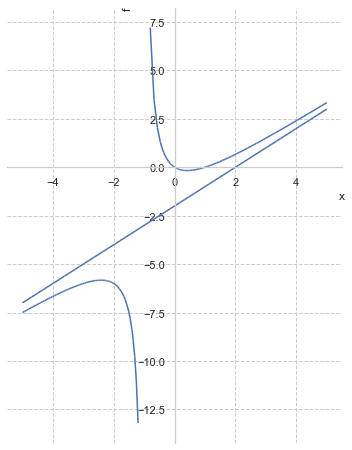

In [21]:
CurveSketching("(x**3 -2*x**2 + x)", "x**2 - 1", xranges=[(-5,-1.2), (-0.8,5)])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
maximum


<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
minimum


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
point of inflection


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

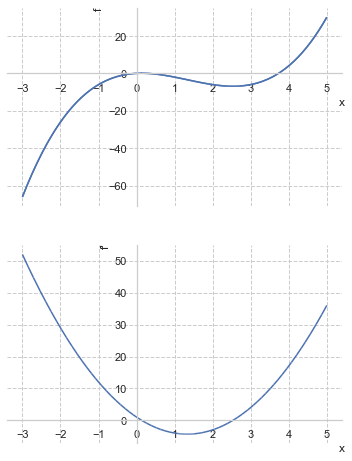

In [22]:
CurveSketching("(x**3 -4*x**2 + x)", plotnderiv=1, xranges=[(-3,5)])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
minimum


<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
maximum


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

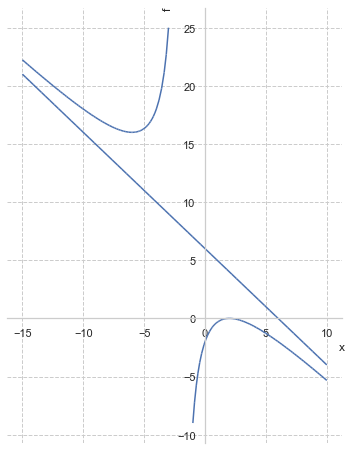

In [23]:
CurveSketching("-(x-2)**2", "x+2", xranges=[(-15, -3), (-1, 10)])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
minimum


<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
maximum


<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
minimum


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
point of inflection


<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
point of inflection


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

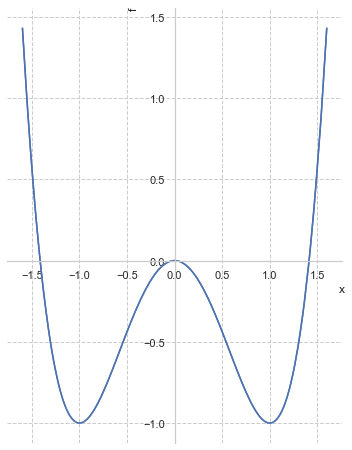

In [24]:
CurveSketching("x**4 - 2*x**2",xranges=[(-1.6, 1.6)])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
maximum


<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
minimum


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

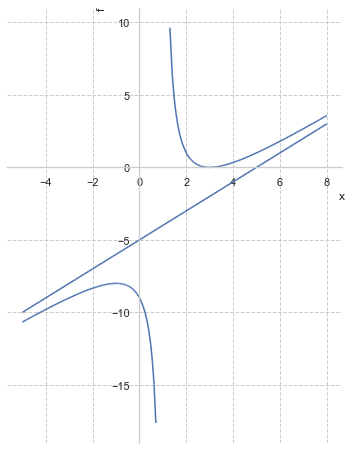

In [25]:
CurveSketching(" (x-3)**2", "x-1",xranges=[(-5, 0.7),(1.3, 8)])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
minimum


<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
saddle point


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
point of inflection


<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
saddle point


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

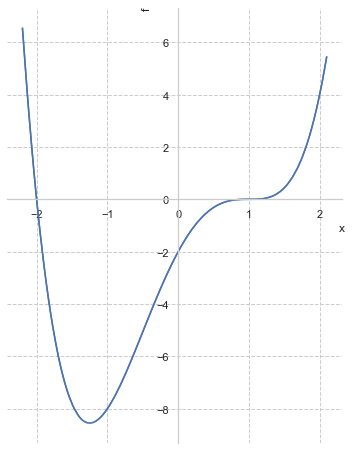

In [9]:
CurveSketching("(x**4 -x**3 -3*x**2 + 5*x - 2)", xranges=[(-2.2,2.1)])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
maximum


<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
minimum


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
point of inflection


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

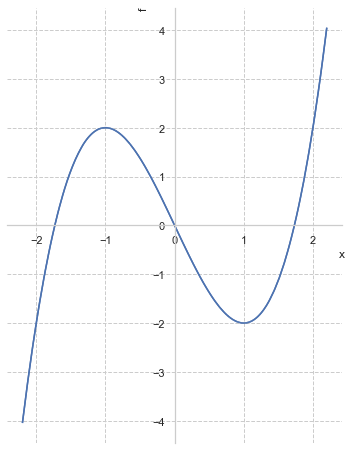

In [10]:
CurveSketching("x**3 - 3*x",xranges=[(-2.2, 2.2)])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
minimum


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
point of inflection


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

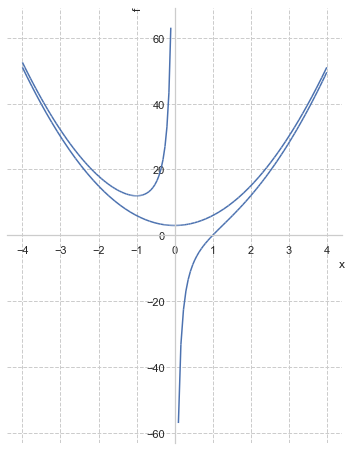

In [11]:
CurveSketching("3*x**3 + 3*x -6", "x", xranges=[(-4, -0.1), (0.1, 4)])

In [12]:
div(sympify("x**3 + 3*x +7"), sympify("x**2+2"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

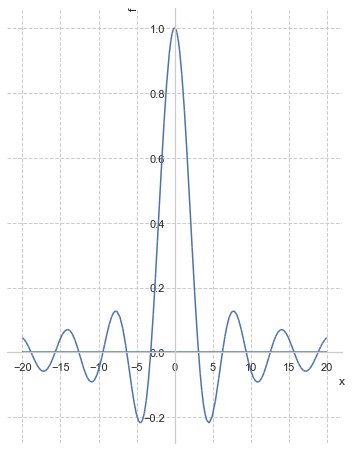

In [13]:
CurveSketching("sin(x)", "x", xranges=[(-20, -0.001), (0.001, 20)], maxSols=3)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
minimum


<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
minimum


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
point of inflection


<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
point of inflection


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

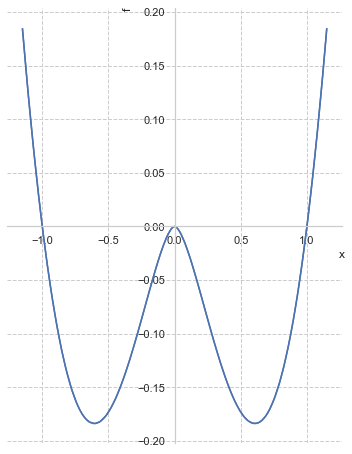

In [14]:
CurveSketching("1/2 * ln(x**2)*x^2", xranges=[(-1.15, -0.0001),(0.0001, 1.15)]) # same as x^2 ln(|x|) from lecture, using ln(|x|) = ln(sqrt(x^2))=0.5 ln(x^2)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
maximum


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
point of inflection


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

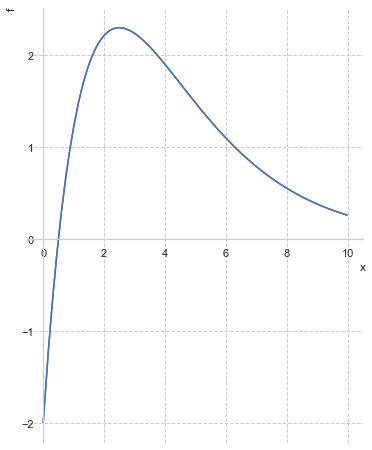

In [15]:
CurveSketching("(4*x-2)*exp(-x/2)",xranges=[(0, 10)])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
maximum


<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
minimum


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
point of inflection


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

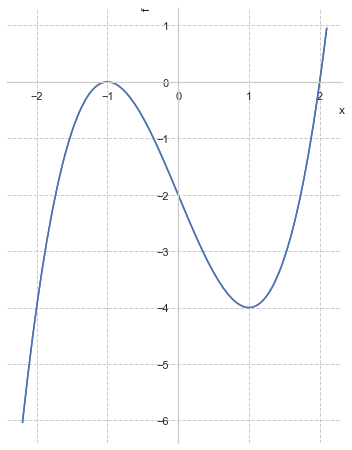

In [16]:
CurveSketching("x**3 - 3*x -2", xranges=[(-2.2,2.1)])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
minimum


<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
saddle point


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
point of inflection


<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
saddle point


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

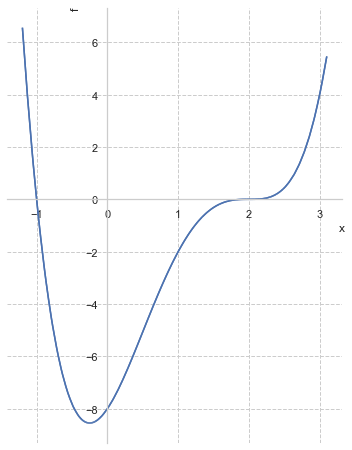

In [17]:
CurveSketching("((x-1)**4 -(x-1)**3 -3*(x-1)**2 + 5*(x-1) - 2)", xranges=[(-1.2,3.1)])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
maximum


<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
minimum


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

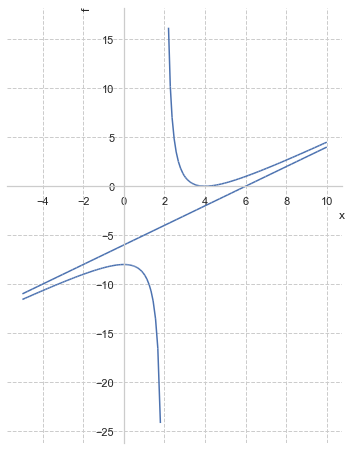

In [18]:
CurveSketching(" (x-4)**2", "x-2",xranges=[(-5, 1.8),(2.2, 10)])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
saddle point


<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
maximum


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
saddle point


<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------
point of inflection


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---------------------------


<IPython.core.display.Math object>

<IPython.core.display.Math object>

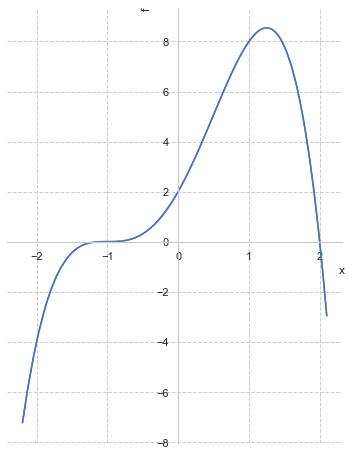

In [19]:
CurveSketching("-x**4 - x**3 +3*x**2 + 5*x + 2", xranges=[(-2.2,2.1)])